## V tomto notebooku

- Graf 1: Počet znaků, KPI11,KPI22, KPI333 (obsáhlost kurzů) - počet znaků 
- Graf 2: Doba čtení a délka videí, KPI11, KPI22, KPI333 (obsáhlost kurzů) - délka čtení + délka videí
- Graf 3: Uživatelé, noví, vracející se, KPI11, KPI22, KPI33 (uživatelé) - uživatelé (celek) X noví X vracející se
- Graf 4: Počet návštěv a zobrazení stránek na uživatele, KPI11, KPI22, KPI33 (návštěvnost) - uživatelé X počet návštěv X zobrazení stránek (asi v přepočtu na jednoho)
- Graf 5: Věk, KPI11,KPI22, KPI33 (věkové rozložení) - věkové skupiny (lze zvýraznit největší)
- Graf 6: Pohlaví, KPI11, KPI22, KPI33 (uživatelé dle pohlaví) - ženy X muži X nezjištěné pohlaví X uživatelé (celek)
- Graf 7: Zařízení, KPI11, KPI22, KPI33 (použité zařízení) - počítač X mobil X tablet X uživatelé (celek)
- Graf 8: Prohlížeč, KPI11, KPI22, KPI33 (použitý prohlížeč) - prohlížeče X uživatelé (celek) (lze zvýraznit největší)
- Graf 9: Akvizice, KPI11, KPI22, KPI33 (přístup) - organicky X přímo X odkazovaně X sociální síť X uživatelé (celek)
- Graf 10: Obrázky, videa, odkazy, KPI11, KPI22, KPI33 (interaktivita) - obrázky X videa X odkazy 

In [1]:
# analytics
import pandas as pd
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np

# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns
# sns.set()

In [2]:
%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (9.5, 5.5)

In [3]:
DATA_PATH = '../data/Komparace.xlsx'

## Data

In [4]:
df = pd.read_excel(DATA_PATH)
df = df.set_index('Kurz')
df = df.T
df = df.rename_axis(None, axis = 1)

print(df.shape)
df.head()

(3, 39)


,Období,Stránky,Témata,Věty,Slova,Znaky,Doba čtení,Obrázky,Videa,Délka videí,Odkazy,Uživatelé,Noví,Vracející se,Návštěvy,Zobrazení stránek,Míra okamžitého opuštění,Česko,18-24,25-34,35-44,45-54,55-64,65+,Ženy,Muži,Nezjištěné pohlaví,Chrome,Safari,Firefox,Edge,Opera,Počítač,Mobil,Tablet,Organicky,Přímo,Odkazovaně,Sociální síť
KPI11,5.10.2020 - 17.1.2021,35,6,2778,22865,154763,02:15:00,48,4,00:10:06,348,3178,3077,830,8471,26668,55.93,2949,332,421,179,164,118,144,780,537,1899,1958,584,255,159,101,2462,678,39,1721,1401,131,67
KPI22,17.2.2020 - 15.5.2020,56,5,3022,42959,275375,03:59:00,45,23,02:24:58,461,3175,2964,899,10257,53828,41.81,3047,434,475,187,107,69,70,912,415,1872,1996,558,284,125,70,2305,819,52,2029,922,210,161
KPI33,5.10.2020 - 17.1.2021,32,5,2414,43928,293252,03:55:00,69,2,00:14:03,638,865,816,196,1856,6129,53.07,796,62,116,59,45,38,35,214,137,517,512,142,73,58,29,631,226,8,554,228,76,24


## Grafy

In [5]:
# matplotlib.style.use(['seaborn-paper', 'paper', 'paper_twocol'])
matplotlib.style.use(['seaborn-paper'])

#### Graf 1

- Počet znaků, KPI11, KPI22, KPI333 (obsáhlost kurzů) - počet znaků 

<IPython.core.display.Javascript object>


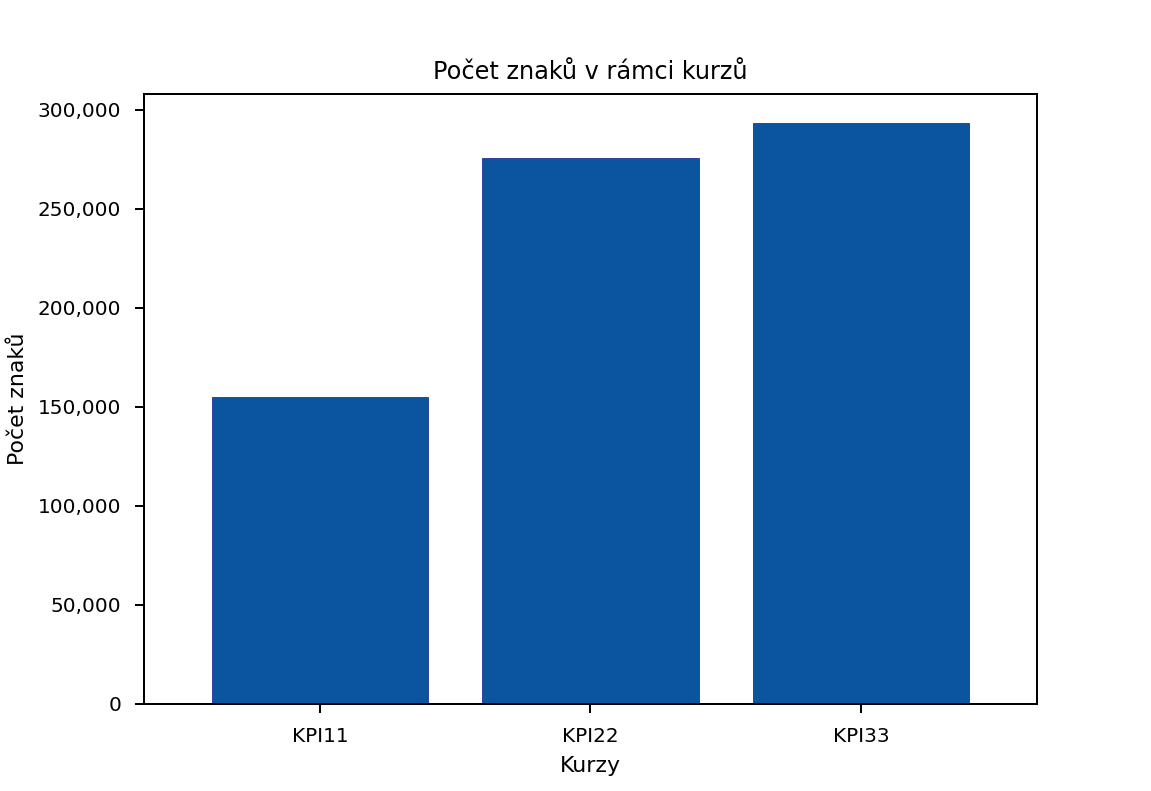

In [6]:
ax = (
    df
    .Znaky
    .plot(kind='bar', rot=0, width=0.8, color=sns.color_palette('Blues_r', n_colors=6)[0], edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .25, p.get_height() * 1.015))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet znaků')
ax.set_title('Počet znaků v rámci kurzů')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graf 2

- Doba čtení a délka videí, KPI11, KPI22, KPI333 (obsáhlost kurzů) - délka čtení + délka videí
- *Poznámka*: 
    - Není zde chyba? Délka videa u druhého kurzu vypadá podezřele.

In [7]:
cols = ['Doba čtení', 'Délka videí']
s = df[cols].copy()

for col in cols:
    s[col + ' v hod'] = s[col].apply(lambda x: x.hour + (x.minute / 60) + (x.second / 3600))
    

s['Délka interakce v hod'] = s['Doba čtení v hod'] + s['Délka videí v hod']

s

,Doba čtení,Délka videí,Doba čtení v hod,Délka videí v hod,Délka interakce v hod
KPI11,02:15:00,00:10:06,2.250000,0.168333,2.418333
KPI22,03:59:00,02:24:58,3.983333,2.416111,6.399444
KPI33,03:55:00,00:14:03,3.916667,0.234167,4.150833


<IPython.core.display.Javascript object>


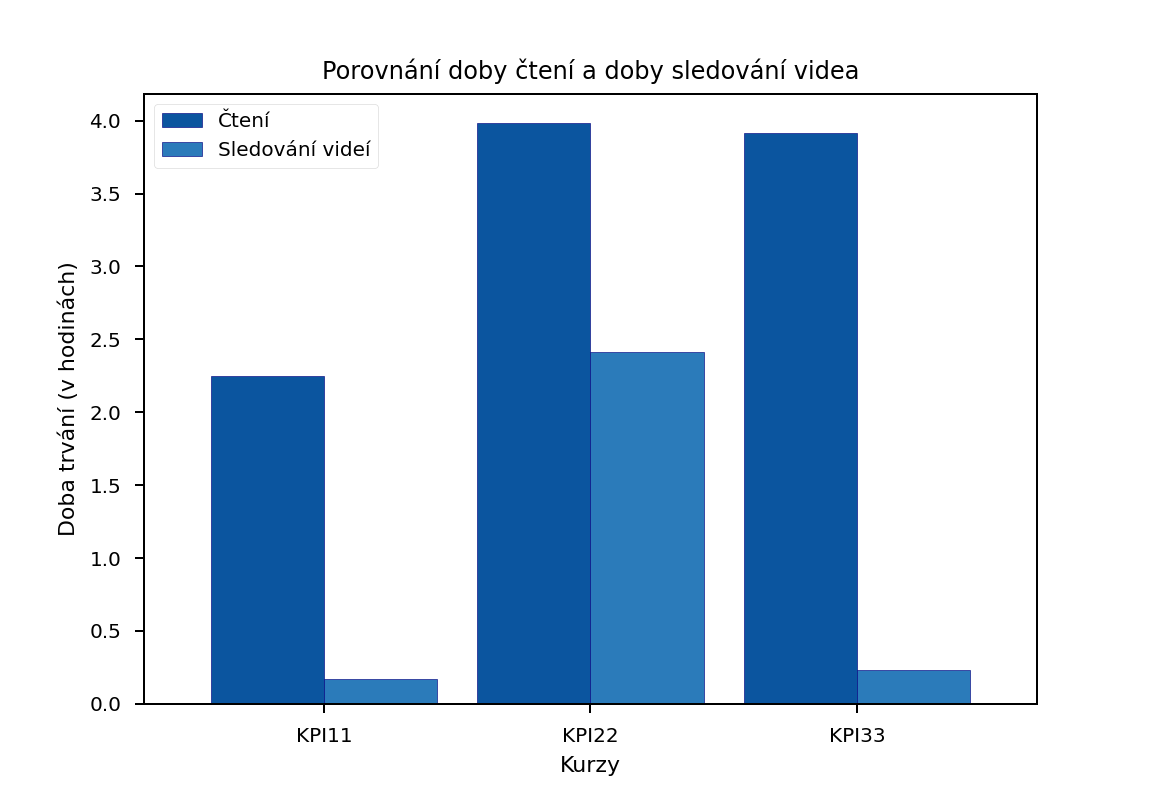

Text(0.5, 1.0, 'Porovnání doby čtení a doby sledování videa')

In [8]:
ax = (
    s[['Doba čtení v hod', 'Délka videí v hod']]
    .rename({'Doba čtení v hod': 'Čtení', 'Délka videí v hod': 'Sledování videí'}, axis=1)
    .plot(kind='bar', rot=0, width=.85, color=sns.color_palette('Blues_r', n_colors=6), edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .2, p.get_height() + .05))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Doba trvání (v hodinách)')
ax.set_title('Porovnání doby čtení a doby sledování videa')

<IPython.core.display.Javascript object>


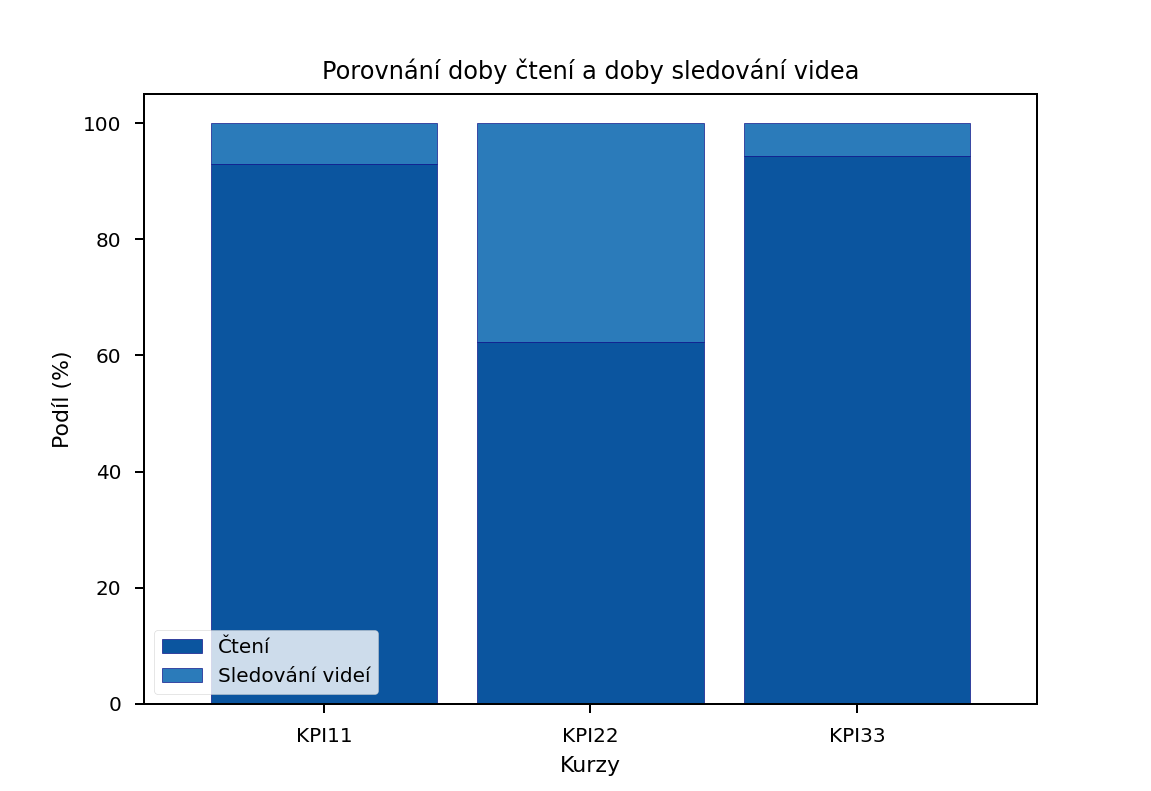

In [9]:
ax = (
    s[['Doba čtení v hod', 'Délka videí v hod']]
    .div(s[['Doba čtení v hod', 'Délka videí v hod']].sum(axis=1), axis=0)
    .rename({'Doba čtení v hod': 'Čtení', 'Délka videí v hod': 'Sledování videí'}, axis=1)
    .multiply(100)
    .plot(
        kind='bar', 
        stacked=True,
        rot=0, 
        width=.85, 
        color=sns.color_palette('Blues_r', n_colors=6), 
        edgecolor='navy'
    )
)

ax.set_xlabel('Kurzy')
ax.set_ylabel('Podíl (%)')
ax.set_title('Porovnání doby čtení a doby sledování videa')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

<IPython.core.display.Javascript object>


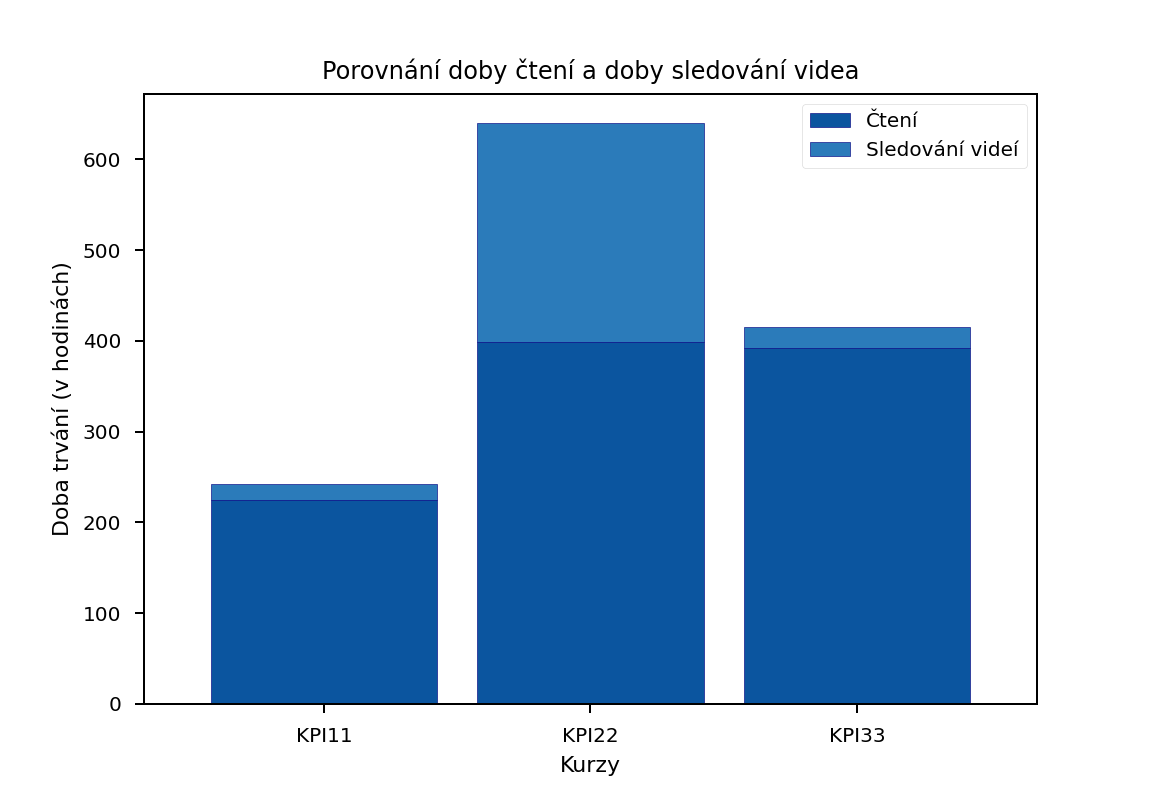

In [10]:
ax = (
    s[['Doba čtení v hod', 'Délka videí v hod']]
    .rename({'Doba čtení v hod': 'Čtení', 'Délka videí v hod': 'Sledování videí'}, axis=1)
    .multiply(100)
    .plot(
        kind='bar', 
        stacked=True,
        rot=0, 
        width=.85, 
        color=sns.color_palette('Blues_r', n_colors=6), 
        edgecolor='navy'
    )
)

ax.set_xlabel('Kurzy')
ax.set_ylabel('Doba trvání (v hodinách)')
ax.set_title('Porovnání doby čtení a doby sledování videa')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

<IPython.core.display.Javascript object>


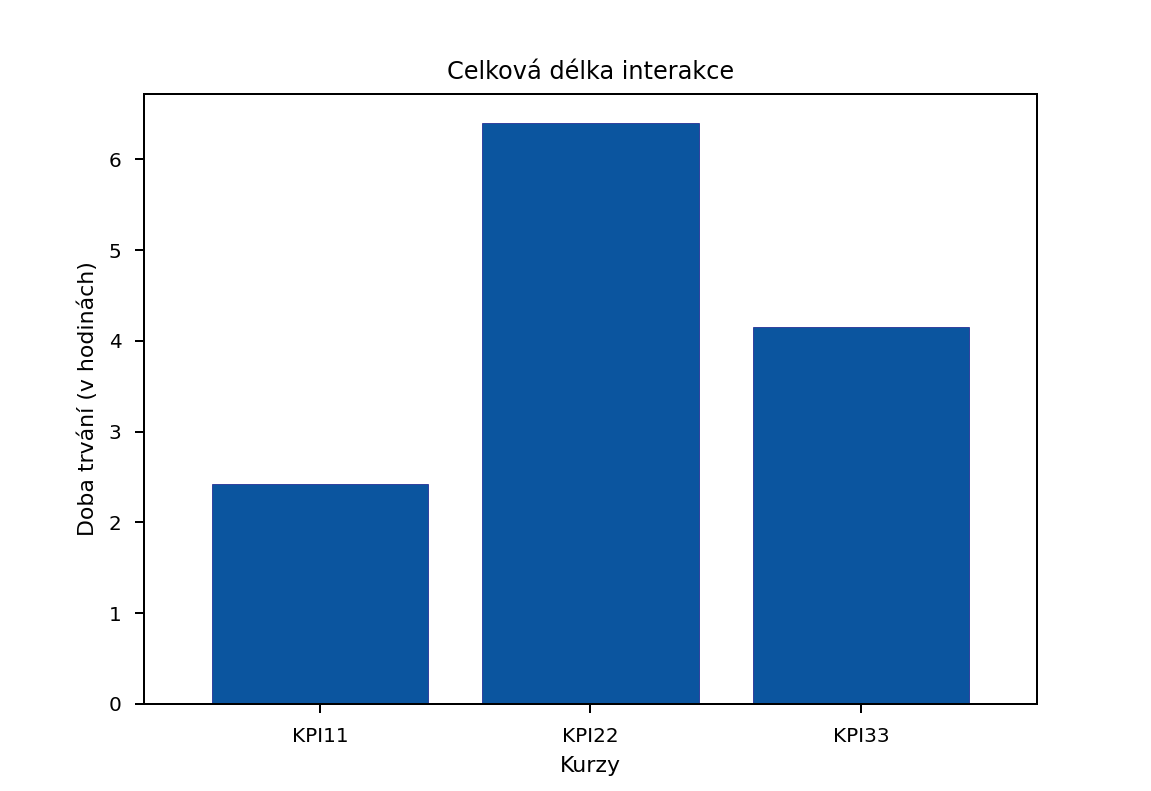

In [11]:
ax = (
    s['Délka interakce v hod']
    .plot(kind='bar', rot=0, width=0.8, color=sns.color_palette('Blues_r', n_colors=6)[0], edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .25, p.get_height() * 1.015))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Doba trvání (v hodinách)')
ax.set_title('Celková délka interakce')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graf 3

- Uživatelé, noví, vracející se, KPI11, KPI22, KPI33 (uživatelé) - uživatelé (celek) X noví X vracející se
- *Poznámka*: 
    - Není zde chyba? Součet nových a vracejících se uživatelů nedává hodnotu celku.

<IPython.core.display.Javascript object>


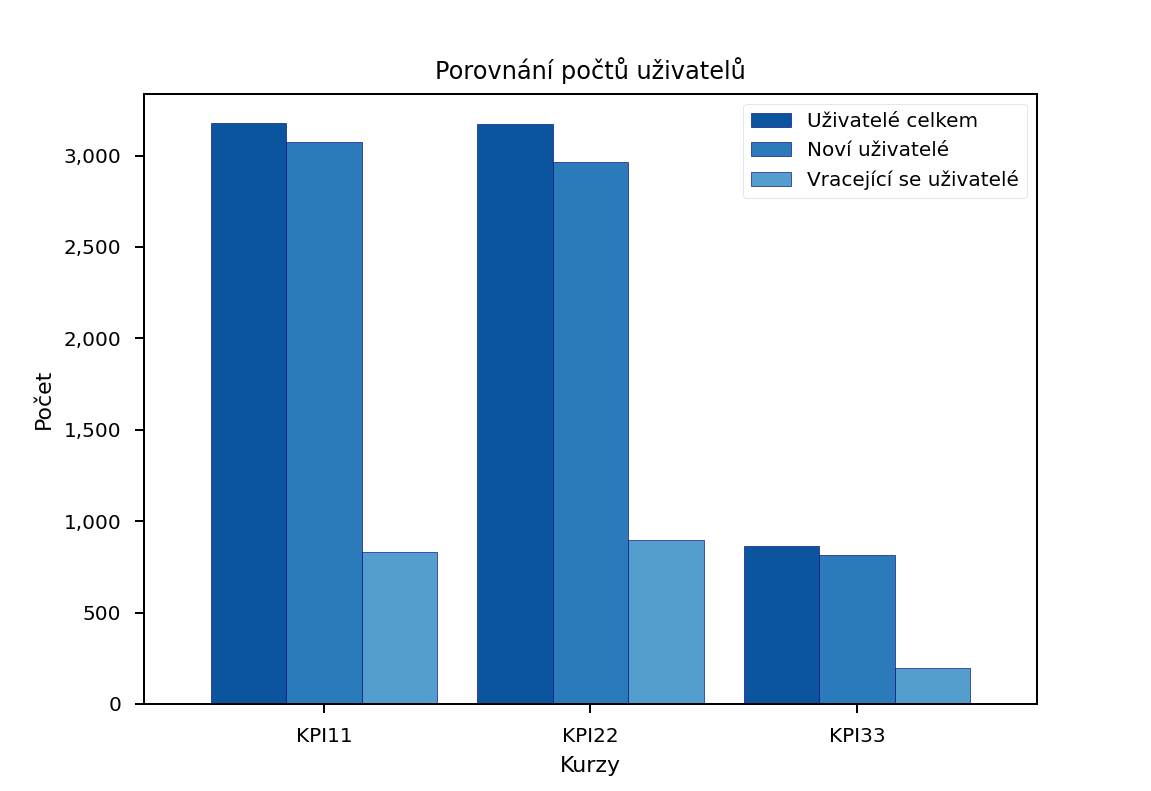

In [12]:
ax = (
    df[['Uživatelé', 'Noví', 'Vracející se']]
    .rename(
        {
            'Uživatelé': 'Uživatelé celkem', 
            'Noví': 'Noví uživatelé', 
            'Vracející se': 'Vracející se uživatelé'
        }, 
        axis=1
    )
    .plot(kind='bar', rot=0, width=.85, color=sns.color_palette('Blues_r', n_colors=6), edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .04, p.get_height() + 40))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet')
ax.set_title('Porovnání počtů uživatelů')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

<IPython.core.display.Javascript object>


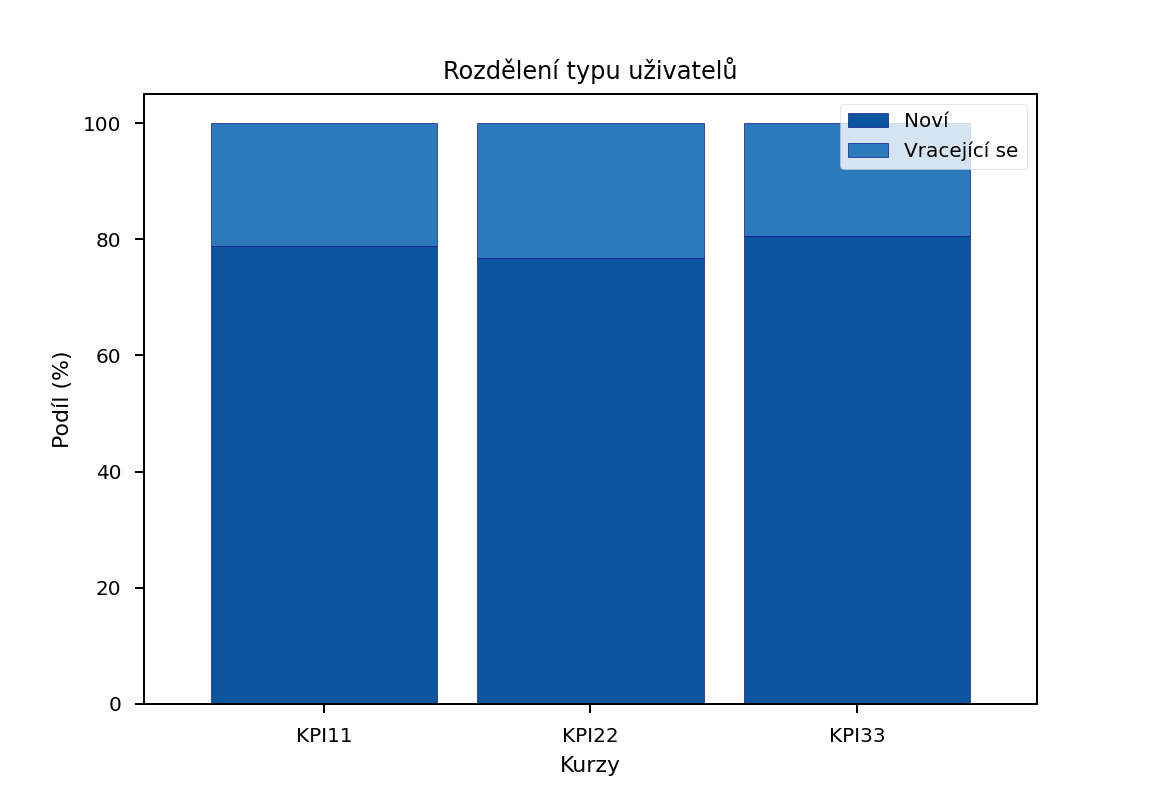

In [13]:
ax = (
    df[['Noví', 'Vracející se']]
    .div(df[['Noví', 'Vracející se']].sum(axis=1), axis=0)
    .multiply(100)
    .plot(
        kind='bar', 
        stacked=True,
        rot=0, 
        width=.85, 
        color=sns.color_palette('Blues_r', n_colors=6), 
        edgecolor='navy'
    )
)

ax.set_xlabel('Kurzy')
ax.set_ylabel('Podíl (%)')
ax.set_title('Rozdělení typu uživatelů')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graf 4

- Počet návštěv a zobrazení stránek na uživatele, KPI11, KPI22, KPI33 (návštěvnost) - uživatelé X počet návštěv X zobrazení stránek (asi v přepočtu na jednoho)
- *Poznámka*: 
    - 

<IPython.core.display.Javascript object>


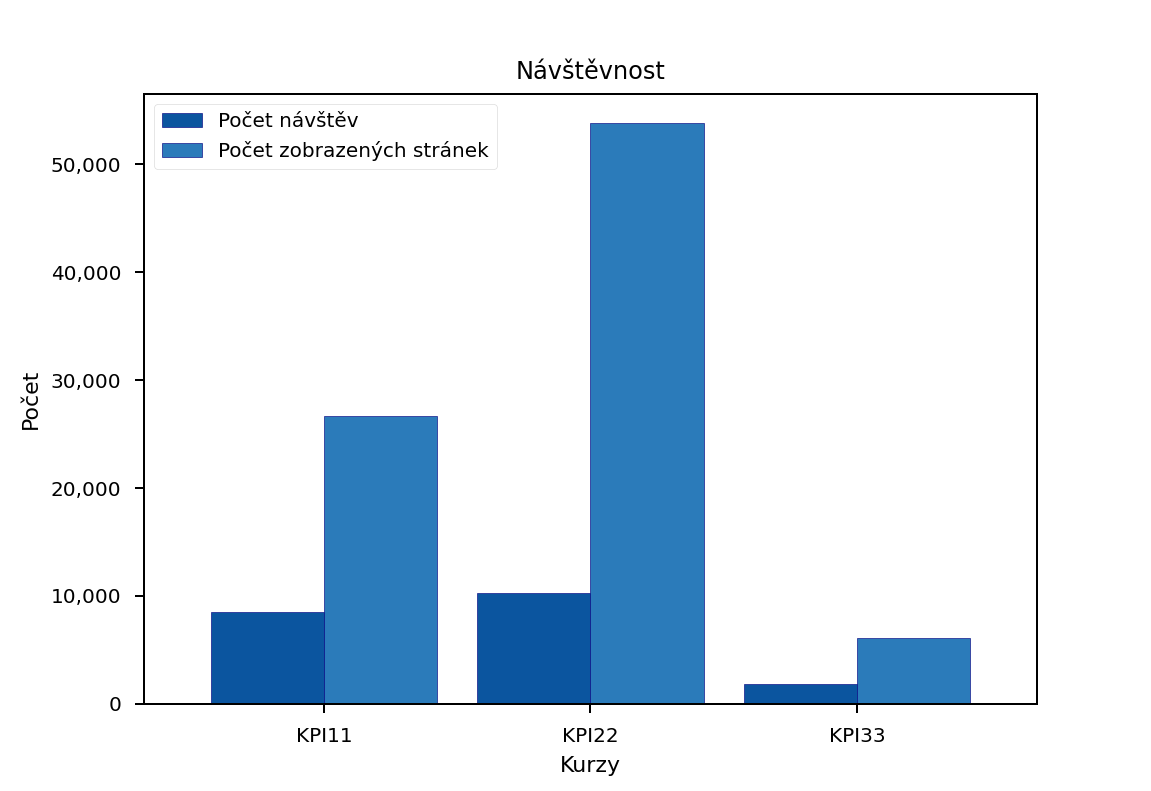

In [14]:
ax = (
    df[['Návštěvy', 'Zobrazení stránek']]
    .rename({'Návštěvy': 'Počet návštěv', 'Zobrazení stránek': 'Počet zobrazených stránek'}, axis=1)
    .plot(kind='bar', rot=0, width=.85, color=sns.color_palette('Blues_r', n_colors=6), edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .085, p.get_height() + 750))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet')
ax.set_title('Návštěvnost')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

<IPython.core.display.Javascript object>


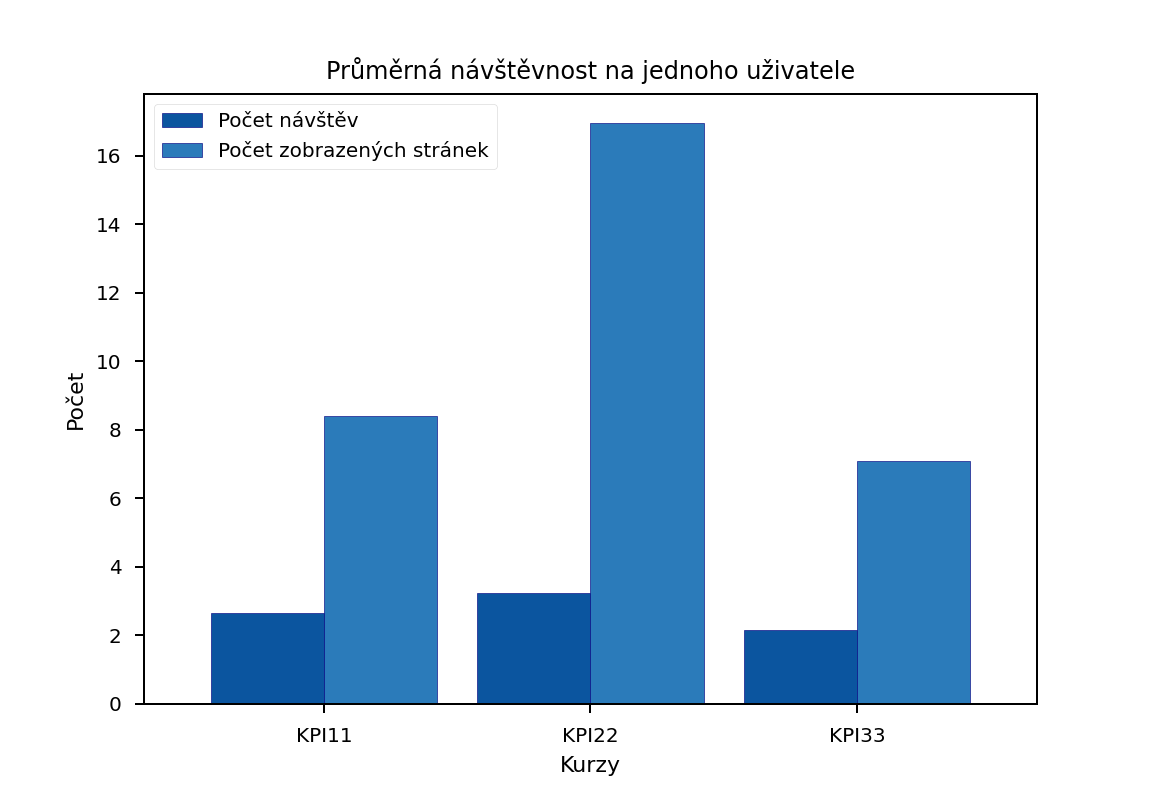

In [15]:
ax = (
    df[['Návštěvy', 'Zobrazení stránek']]
    .div(df['Uživatelé'], axis=0)
    .rename({'Návštěvy': 'Počet návštěv', 'Zobrazení stránek': 'Počet zobrazených stránek'}, axis=1)
    .plot(kind='bar', rot=0, width=.85, color=sns.color_palette('Blues_r', n_colors=6), edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .2, p.get_height() + .2))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet')
ax.set_title('Průměrná návštěvnost na jednoho uživatele')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graf 5

- Věk, KPI11,KPI22, KPI33 (věkové rozložení) - věkové skupiny (lze zvýraznit největší)
- *Poznámka*: 
    -

<IPython.core.display.Javascript object>


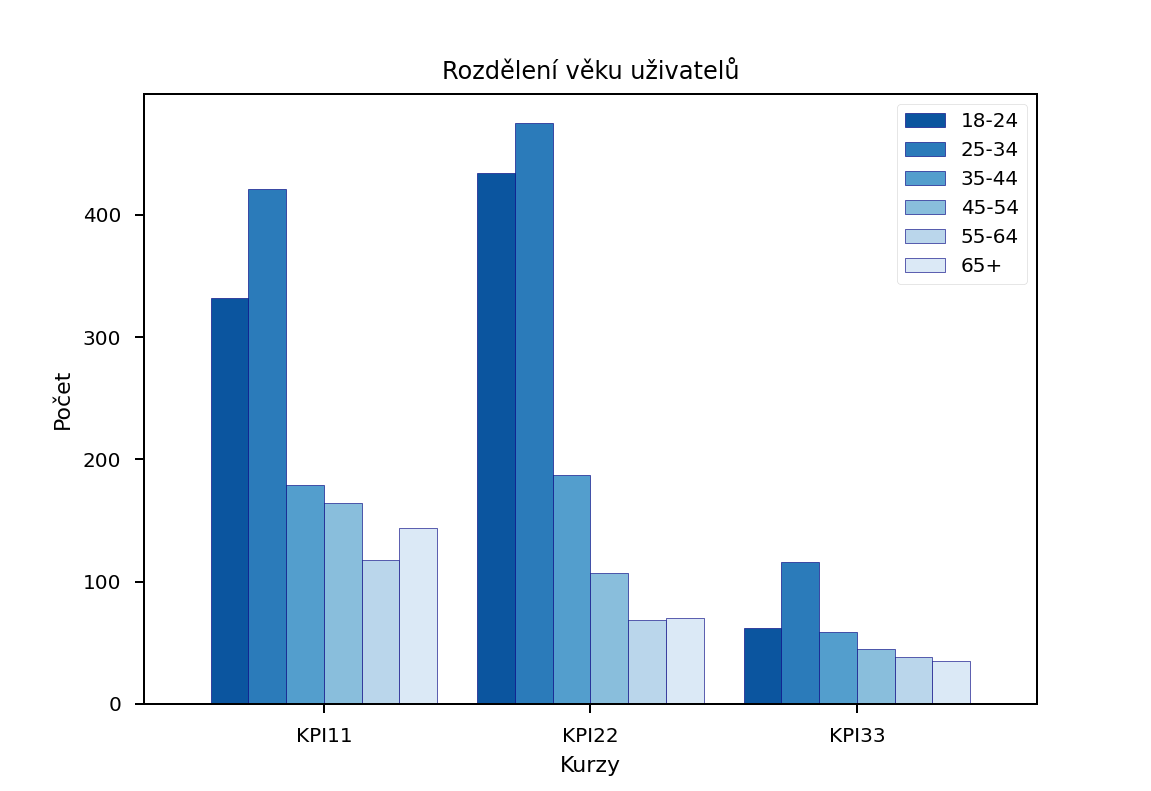

In [16]:
ax = (
    df[['18-24', '25-34', '35-44', '45-54', '55-64', '65+']]
    .plot(kind='bar', rot=0, width=.85, color=sns.color_palette('Blues_r', n_colors=6), edgecolor='navy')
)

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet')
ax.set_title('Rozdělení věku uživatelů')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

<IPython.core.display.Javascript object>


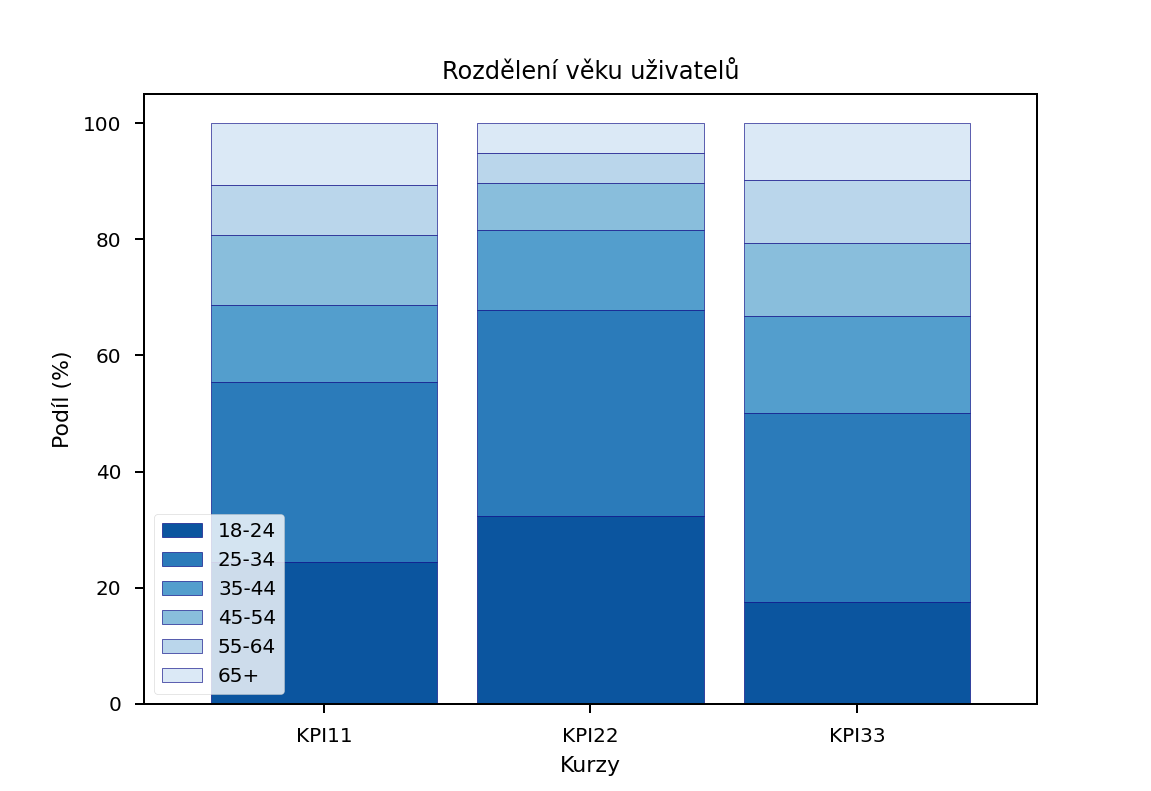

In [17]:
ax = (
    df[['18-24', '25-34', '35-44', '45-54', '55-64', '65+']]
    .div(df[['18-24', '25-34', '35-44', '45-54', '55-64', '65+']].sum(axis=1), axis=0)
    .multiply(100)
    .plot(
        kind='bar', 
        stacked=True,
        rot=0, 
        width=.85, 
        color=sns.color_palette('Blues_r', n_colors=6), 
        edgecolor='navy'
    )
)

ax.set_xlabel('Kurzy')
ax.set_ylabel('Podíl (%)')
ax.set_title('Rozdělení věku uživatelů')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graf 6

- Pohlaví, KPI11, KPI22, KPI33 (uživatelé dle pohlaví) - ženy X muži X nezjištěné pohlaví X uživatelé (celek)
- *Poznámka*: 
    -

<IPython.core.display.Javascript object>


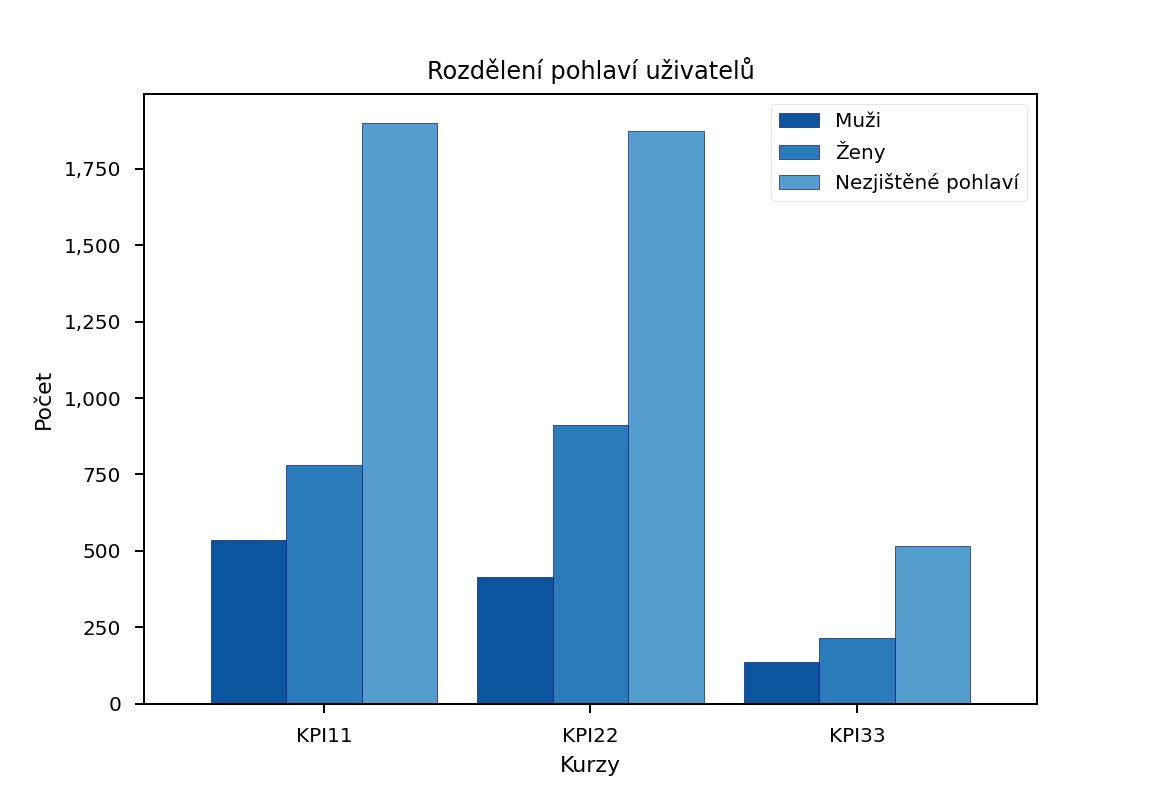

In [18]:
ax = (
    df[['Muži', 'Ženy', 'Nezjištěné pohlaví']]
    .plot(kind='bar', rot=0, width=.85, color=sns.color_palette('Blues_r', n_colors=6), edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .01, p.get_height() + 15))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet')
ax.set_title('Rozdělení pohlaví uživatelů')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

<IPython.core.display.Javascript object>


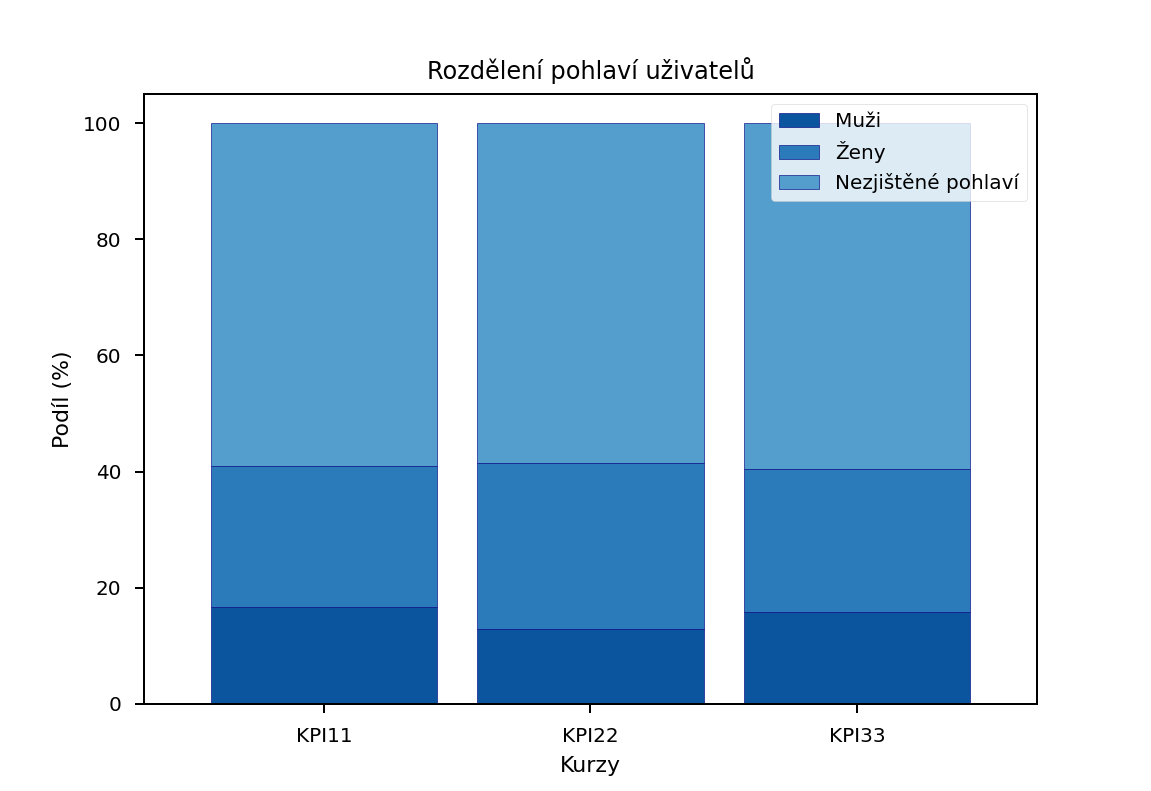

In [19]:
ax = (
    df[['Muži', 'Ženy', 'Nezjištěné pohlaví']]
    .div(df[['Muži', 'Ženy', 'Nezjištěné pohlaví']].sum(axis=1), axis=0)
    .multiply(100)
    .plot(
        kind='bar', 
        stacked=True,
        rot=0, 
        width=.85, 
        color=sns.color_palette('Blues_r', n_colors=6), 
        edgecolor='navy'
    )
)

ax.set_xlabel('Kurzy')
ax.set_ylabel('Podíl (%)')
ax.set_title('Rozdělení pohlaví uživatelů')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graf 7

- Zařízení, KPI11, KPI22, KPI33 (použité zařízení) - počítač X mobil X tablet X uživatelé (celek)
- *Poznámka*: 
    -

<IPython.core.display.Javascript object>


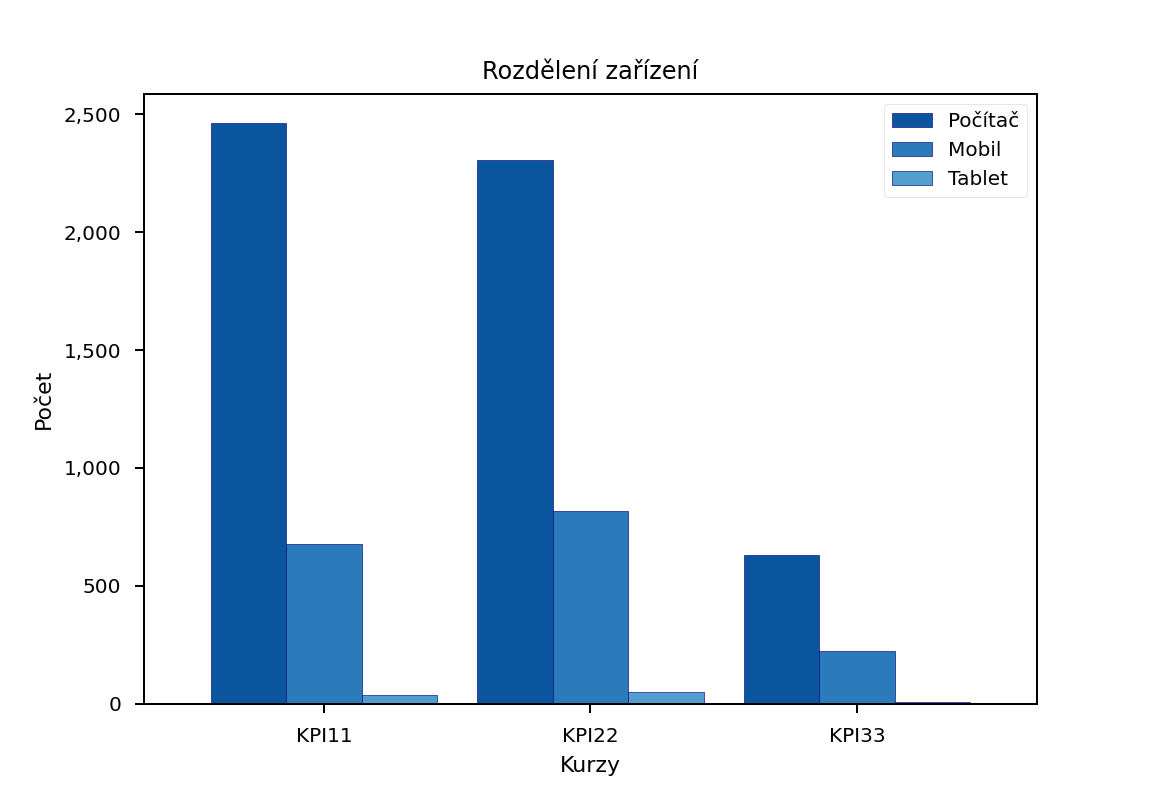

In [20]:
ax = (
    df[['Počítač', 'Mobil', 'Tablet']]
    .plot(kind='bar', rot=0, width=.85, color=sns.color_palette('Blues_r', n_colors=6), edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .05, p.get_height() + 20))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet')
ax.set_title('Rozdělení zařízení')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

<IPython.core.display.Javascript object>


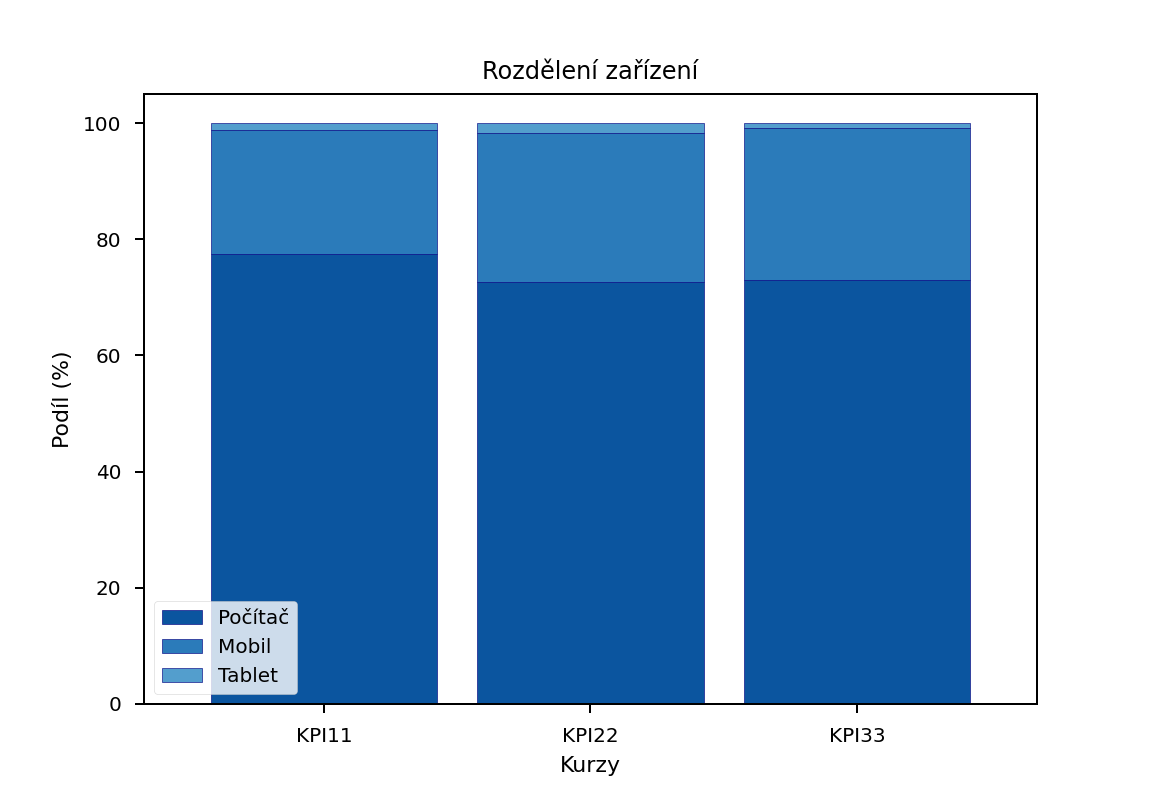

In [21]:
ax = (
    df[['Počítač', 'Mobil', 'Tablet']]
    .div(df[['Počítač', 'Mobil', 'Tablet']].sum(axis=1), axis=0)
    .multiply(100)
    .plot(
        kind='bar', 
        stacked=True,
        rot=0, 
        width=.85, 
        color=sns.color_palette('Blues_r', n_colors=6), 
        edgecolor='navy'
    )
)

ax.set_xlabel('Kurzy')
ax.set_ylabel('Podíl (%)')
ax.set_title('Rozdělení zařízení')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graf 8

- Prohlížeč, KPI11, KPI22, KPI33 (použitý prohlížeč) - prohlížeče X uživatelé (celek) (lze zvýraznit největší)
- *Poznámka*: 
    -

<IPython.core.display.Javascript object>


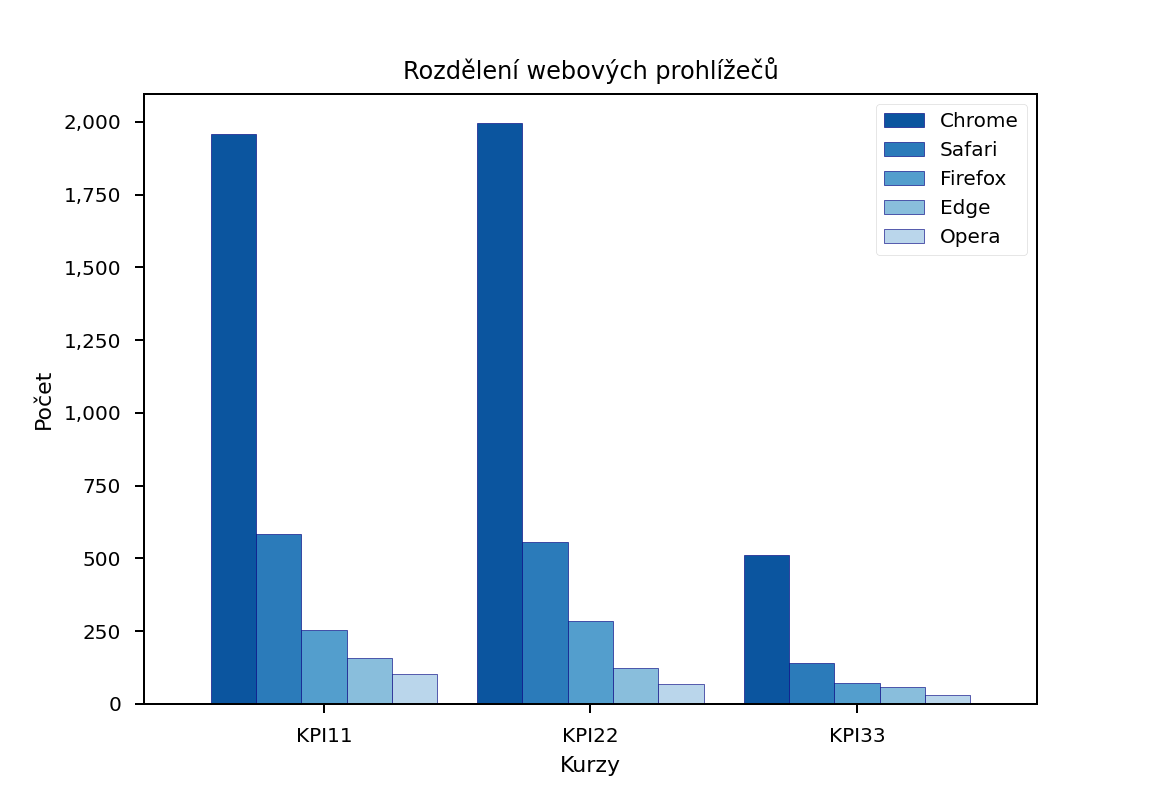

In [22]:
ax = (
    df[['Chrome', 'Safari', 'Firefox', 'Edge', 'Opera']]
    .plot(kind='bar', rot=0, width=.85, color=sns.color_palette('Blues_r', n_colors=6), edgecolor='navy')
)

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet')
ax.set_title('Rozdělení webových prohlížečů')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

<IPython.core.display.Javascript object>


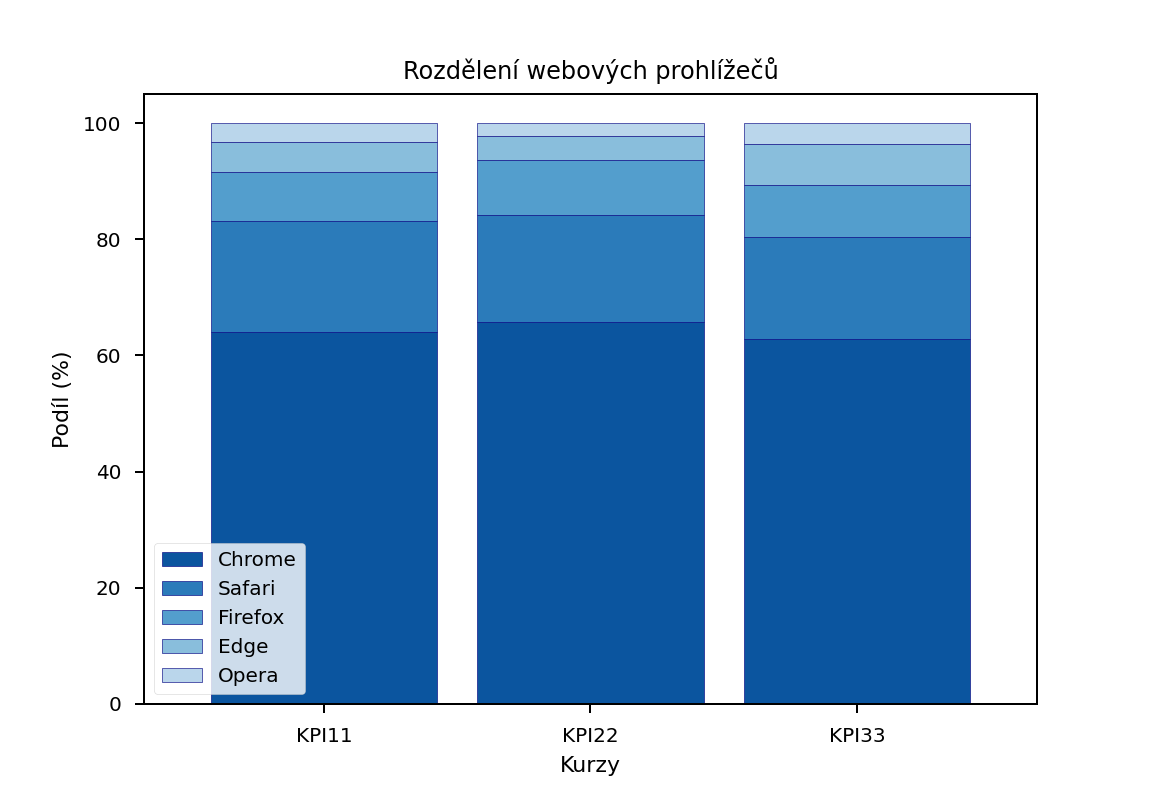

In [23]:
ax = (
    df[['Chrome', 'Safari', 'Firefox', 'Edge', 'Opera']]
    .div(df[['Chrome', 'Safari', 'Firefox', 'Edge', 'Opera']].sum(axis=1), axis=0)
    .multiply(100)    
    .plot(
        kind='bar', 
        stacked=True,
        rot=0, 
        width=.85, 
        color=sns.color_palette('Blues_r', n_colors=6), 
        edgecolor='navy')
)

ax.set_xlabel('Kurzy')
ax.set_ylabel('Podíl (%)')
ax.set_title('Rozdělení webových prohlížečů')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graf 9

- Akvizice, KPI11, KPI22, KPI33 (přístup) - organicky X přímo X odkazovaně X sociální síť X uživatelé (celek)
- *Poznámka*: 
    -

<IPython.core.display.Javascript object>


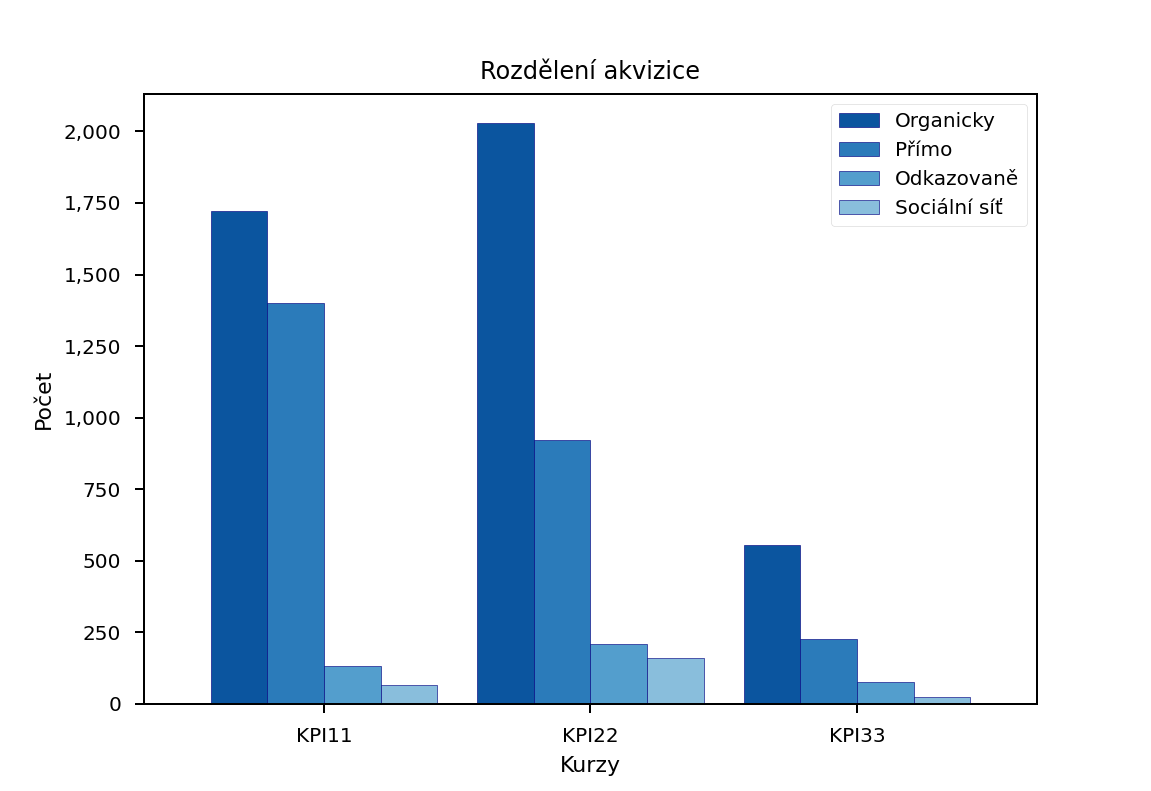

In [24]:
ax = (
    df[['Organicky', 'Přímo', 'Odkazovaně', 'Sociální síť']]
    .plot(kind='bar', rot=0, width=.85, color=sns.color_palette('Blues_r', n_colors=6), edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .03, p.get_height() + 25))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet')
ax.set_title('Rozdělení akvizice')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

<IPython.core.display.Javascript object>


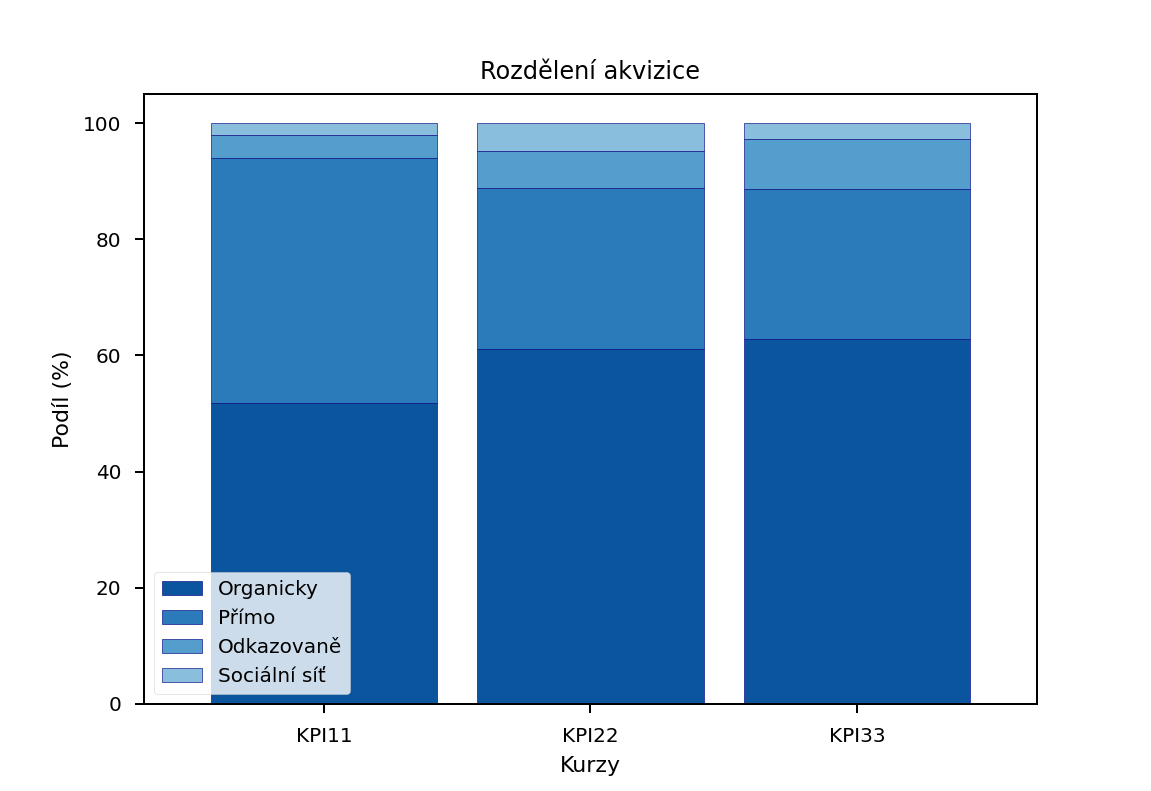

In [25]:
ax = (
    df[['Organicky', 'Přímo', 'Odkazovaně', 'Sociální síť']]
    .div(df[['Organicky', 'Přímo', 'Odkazovaně', 'Sociální síť']].sum(axis=1), axis=0)
    .multiply(100)
    .plot(
        kind='bar', 
        stacked=True,
        rot=0, 
        width=.85, 
        color=sns.color_palette('Blues_r', n_colors=6), 
        edgecolor='navy'
    )
)

ax.set_xlabel('Kurzy')
ax.set_ylabel('Podíl (%)')
ax.set_title('Rozdělení akvizice')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graf 10

- Obrázky, videa, odkazy, KPI11, KPI22, KPI33 (interaktivita) - obrázky X videa X odkazy 
- *Poznámka*: 
    -

<IPython.core.display.Javascript object>


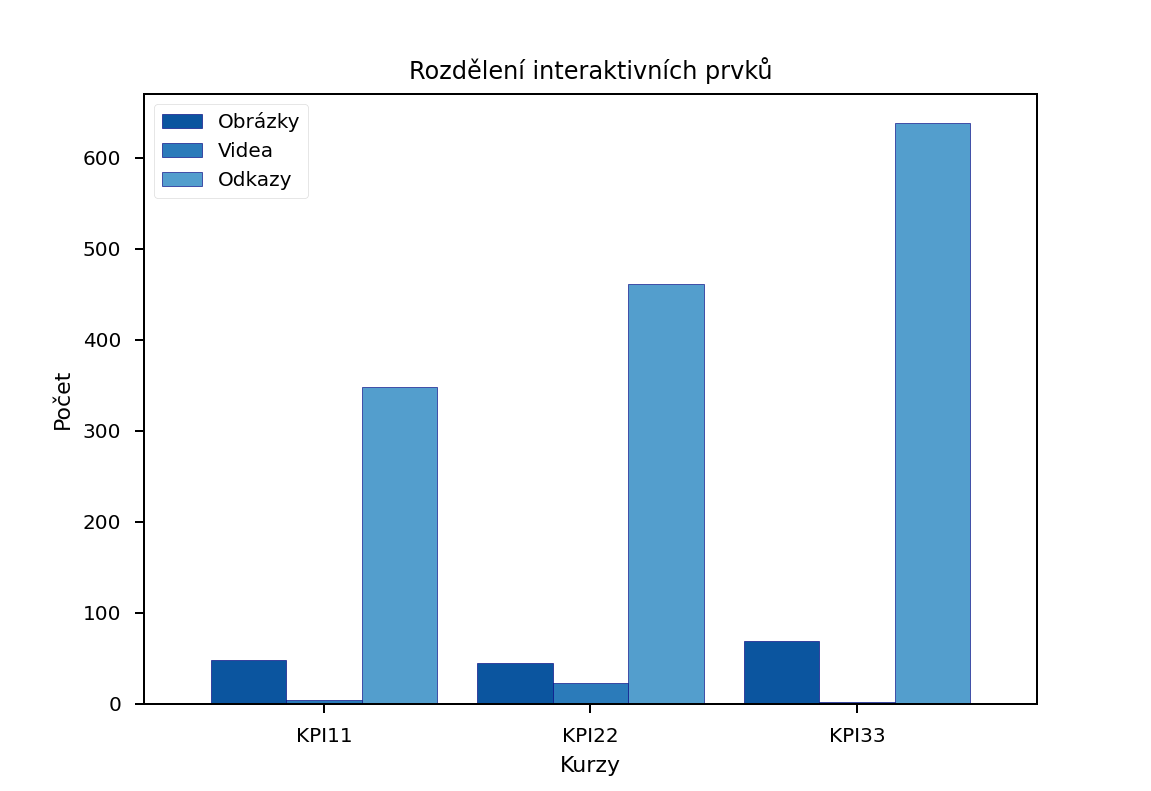

In [26]:
ax = (
    df[['Obrázky', 'Videa', 'Odkazy']]
    .plot(kind='bar', rot=0, width=.85, color=sns.color_palette('Blues_r', n_colors=6), edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .1, p.get_height() + 10))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet')
ax.set_title('Rozdělení interaktivních prvků')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

<IPython.core.display.Javascript object>


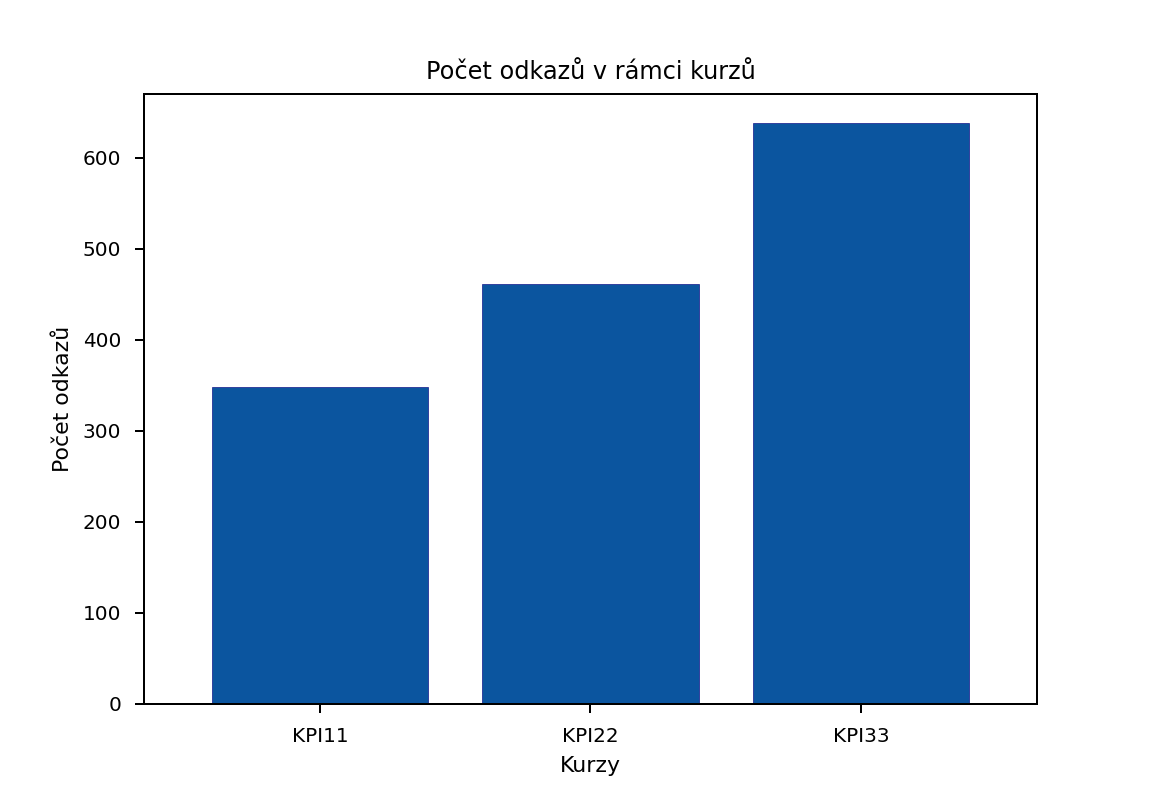

In [27]:
ax = (
    df
    .Odkazy
    .plot(kind='bar', rot=0, width=0.8, color=sns.color_palette('Blues_r', n_colors=6)[0], edgecolor='navy')
)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + .35, p.get_height() + 7.5))

ax.set_xlabel('Kurzy')
ax.set_ylabel('Počet odkazů')
ax.set_title('Počet odkazů v rámci kurzů')

ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))